In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv('StudentsPerformance.csv')

Data Information and Data Checks

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [5]:
data.shape

(1000, 8)

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [10]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64

In [11]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


### 1. Find out how many males and females participated in the test.

In [12]:
g_count = data['gender'].value_counts()
print(g_count)

gender
female    518
male      482
Name: count, dtype: int64


The sample consists of 518 females and 482 males; a relatively even distribution of gender in the sample, with a slight majority of females.

### 2. What do you think about the students' parental level of education?

In [13]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [14]:
data['parental level of education'].value_counts(normalize=True)

parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64

Parental Education of the sample shows that Masters Degree is rare and only 59 parents hold a Masters Degree while 226 parents hold a College Degree.

### 3. Who scores the most on average for math, reading and writing based on Gender and Test preparation course

In [15]:
df_group = data.groupby("gender")

df_columns = df_group[["math score","reading score","writing score"]]

df_columns.mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In Math, on average, Male students have scored more than Female students. 
In Reading, female students have done better than male students. 
Even for Writing, females have performed better than males 

In [17]:
df_group = data.groupby("test preparation course")

df_columns = df_group[["math score","reading score","writing score"]]

df_columns.mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Students who completed the test preparation course scored higher on average in all three subjects compared to those who did not complete the course.

### 4. What do you think about the scoring variation for math, reading and writing based on Gender and Test preparation course

In [37]:

df_group = data.groupby("gender")

df_columns = df_group[["math score","reading score","writing score"]]

df_columns.var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


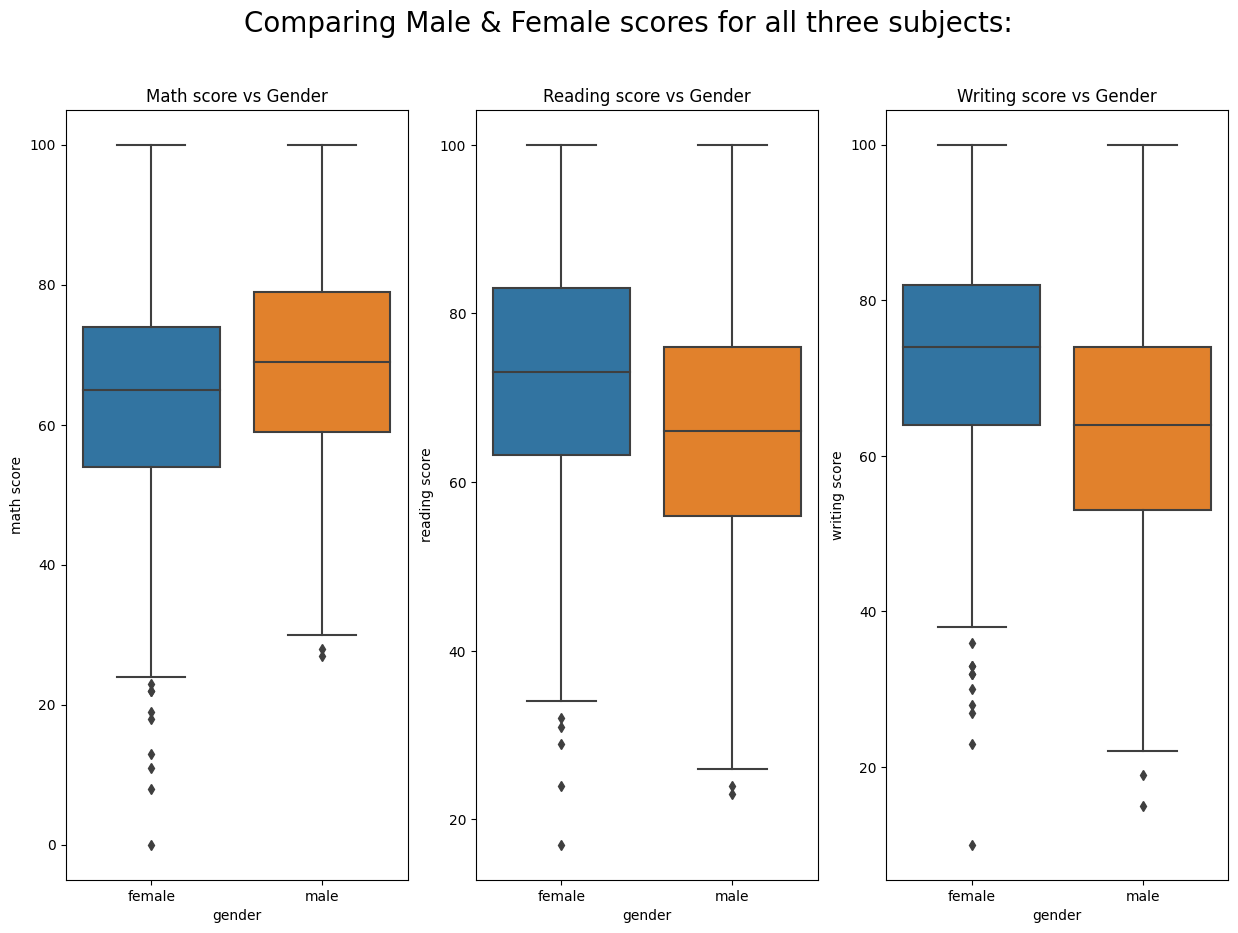

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Comparing Male & Female scores for all three subjects:', fontsize=20) 
# Math score
sns.boxplot(x='gender', y='math score', data=data, ax=ax1)
ax1.title.set_text('Math score vs Gender')
# Reading Score 
sns.boxplot(x='gender', y='reading score', data=data, ax=ax2)
ax2.title.set_text('Reading score vs Gender')
# Writing Score
sns.boxplot(x='gender', y='writing score', data=data, ax=ax3)
ax3.title.set_text('Writing score vs Gender')

variance is higher for females in all 3 subjects.Also outliers are more in the case of females than males


In [40]:
df_group = data.groupby("test preparation course")

df_columns = df_group[["math score","reading score","writing score"]]

df_columns.var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


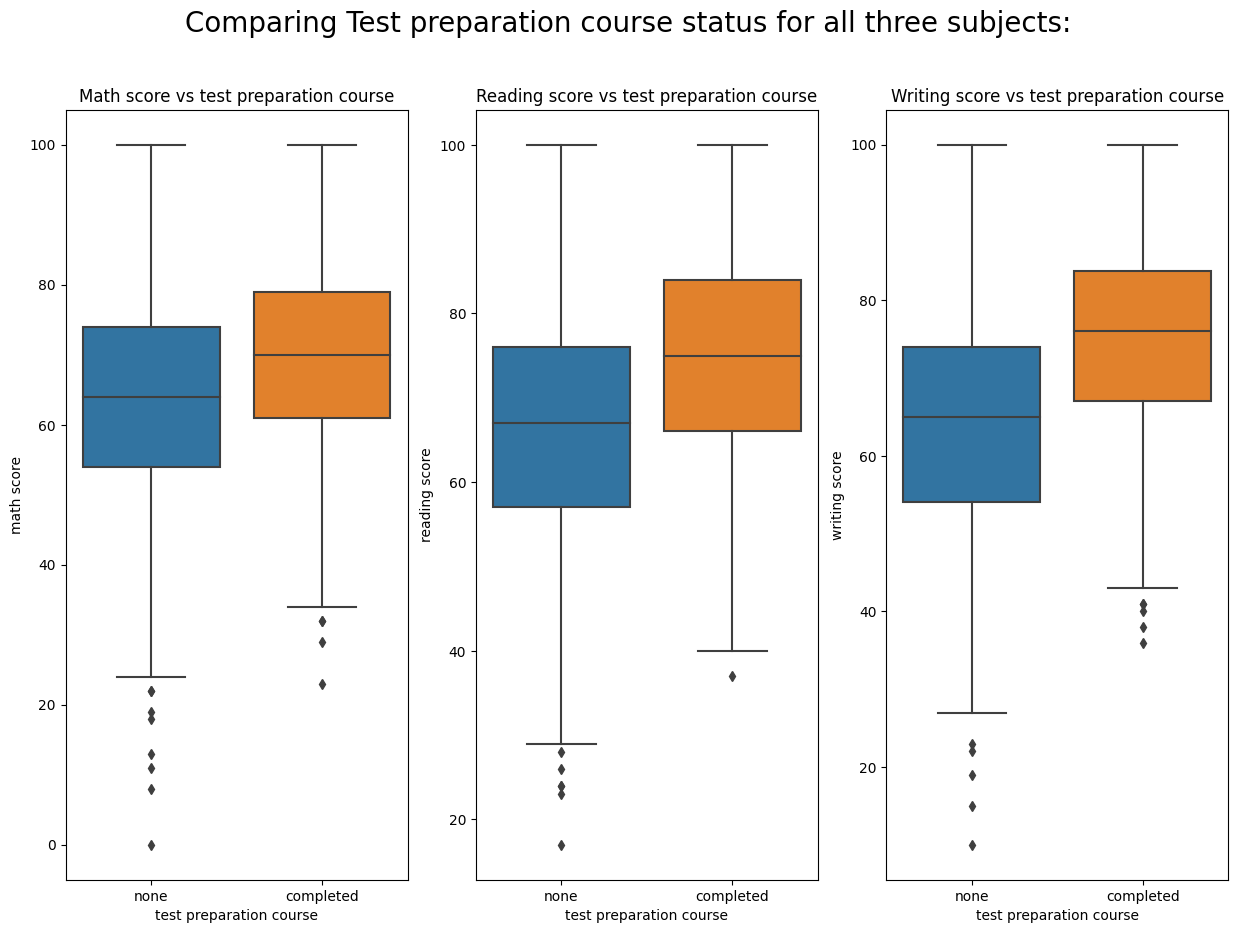

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Comparing Test preparation course status for all three subjects:', fontsize=20) 
# Math score
sns.boxplot(x='test preparation course', y='math score', data=data, ax=ax1)
ax1.title.set_text('Math score vs test preparation course')
# Reading Score 
sns.boxplot(x='test preparation course', y='reading score', data=data, ax=ax2)
ax2.title.set_text('Reading score vs test preparation course')
# Writing Score
sns.boxplot(x='test preparation course', y='writing score', data=data, ax=ax3)
ax3.title.set_text('Writing score vs test preparation course')

Variance is higher for those who did not attend any test preparion course. Outliers are also more for this category compared to their counterparts


### 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

Top 25% can be found using third quantile

In [18]:

math_score_ = data['math score'].quantile(0.75)


data['bonus_points'] = data['math score'].apply(lambda x: x if x > math_score_ else 0)


students_with_bonus = data[data['bonus_points'] > 0]
print(students_with_bonus)


     gender race/ethnicity parental level of education         lunch   
430  female        group A                some college      standard  \
431  female        group B           bachelor's degree  free/reduced   
432  female        group D           bachelor's degree      standard   
433  female        group D                 high school      standard   
434  female        group D           bachelor's degree  free/reduced   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score   
430               completed          78             87        